In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/wine_data.csv',header = None , usecols = [0,1,2])
df.columns = ['Class_label','Alcohol','Malic_acid']
df

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


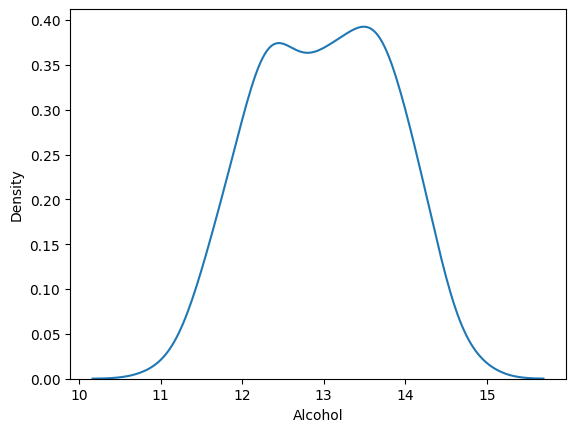

In [5]:
sns.kdeplot(df['Alcohol'])

plt.show()

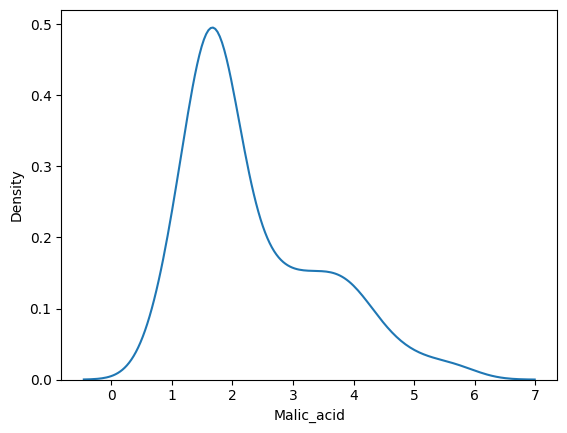

In [7]:
sns.kdeplot(df['Malic_acid'])
plt.show()

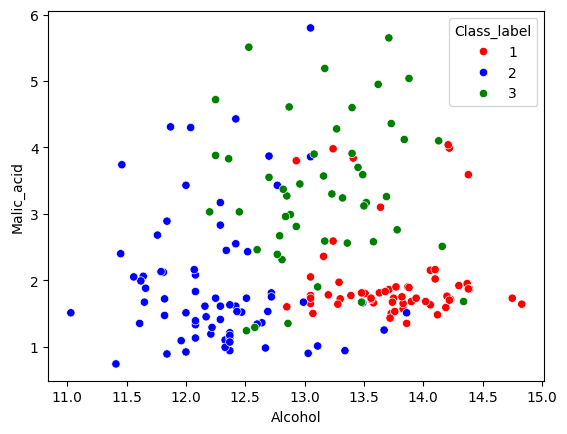

In [15]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(
    x = df['Alcohol'],
    y = df['Malic_acid'],
    hue=df['Class_label'],
    palette=color_dict
)

plt.show()

In [18]:
x = df[['Alcohol', 'Malic_acid']]

y = df['Class_label']

In [22]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)

x_train.shape , x_test.shape


((124, 2), (54, 2))

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


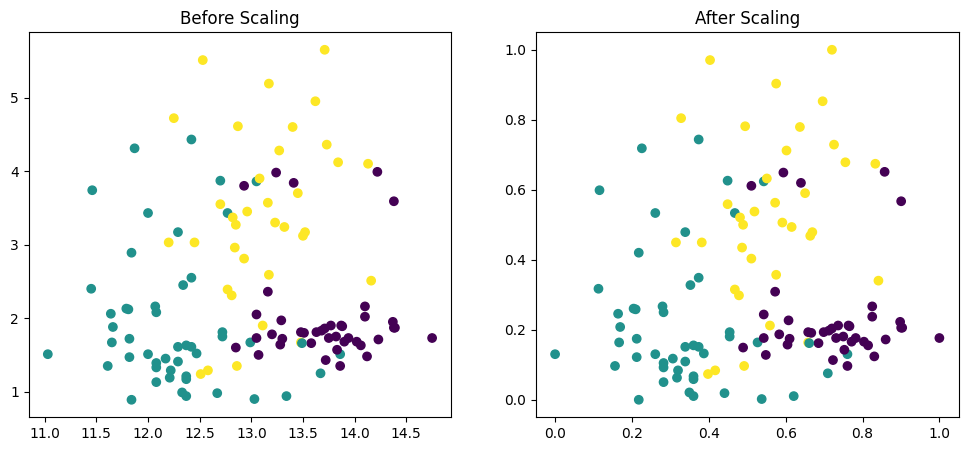

In [33]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize=(12,5))

ax1.scatter(
    x = x_train['Alcohol'],
    y = x_train['Malic_acid'],
    c = y_train
)
ax1.set_title('Before Scaling')

ax2.scatter(
    x = x_train_scaled['Alcohol'],
    y = x_train_scaled['Malic_acid'],
    c = y_train
)
ax2.set_title('After Scaling')

plt.show()